In [2]:
import glob
from bokeh.io import output_notebook
from bokeh.charts import Histogram,Line,Bar,show
from matplotlib import pyplot as plot
import pandas as pd

output_notebook()
%matplotlib inline

Loading BokehJS ...

### Evaluations distribution

In [33]:
filenames = glob.glob("../data/300_convo/*")
categories = ["overall", "start", "interupt", "engaing", "return"]

df = pd.DataFrame(data=np.zeros((len(filenames), len(categories))), 
                  index=[i.split("/")[-1] for i in filenames], columns=categories)

for filename in filenames:
    f = open(filename, "r", errors="replace")
    index = filename.split("/")[-1]
    ratings = f.readlines()[-1].split(",")[:-1]
    for i in ratings:
        category, score = i.split("=")
        df.set_value(index, category, int(score))

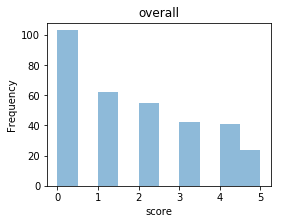

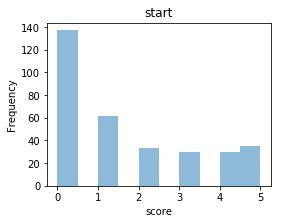

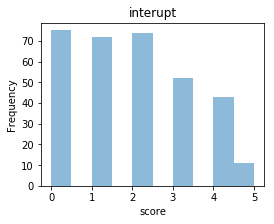

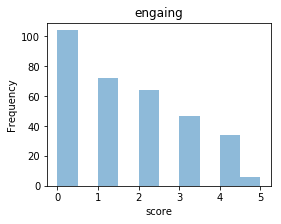

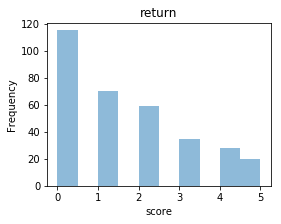

In [55]:
for category in categories:
    plt.figure(category, figsize=(4,3))
    plt.title(category)
    plt.xlabel("score")
    plt.ylabel("score count")
    df[category].plot(kind="hist", alpha=0.5)